# **Introduction Time Series Analysis in Python**

- A **time series** is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time.

- **Time series** are used in statistics, signal processing, pattern recognition, econometrics, mathematical finance, weather forecasting, earthquake prediction, electroencephalography, control engineering, astronomy, communications engineering, and largely in any domain of applied science and engineering which involves temporal measurements.

- **Time series** analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data.

- **Time series forecasting** is the use of a model to predict future values based on previously observed values. While regression analysis is often employed in such a way as to test theories that the current values of one or more independent time series affect the current value of another time series, this type of analysis of time series is not called "time series analysis", which focuses on comparing values of a single time series or multiple dependent time series at different points in time.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("data/IndexE8.csv")
data.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


## **General Informations about the data**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6269 non-null   object 
 1   spx     6269 non-null   float64
 2   dax     6269 non-null   float64
 3   ftse    6269 non-null   float64
 4   nikkei  6269 non-null   float64
dtypes: float64(4), object(1)
memory usage: 245.0+ KB


In [4]:
data.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


## **Setting the date as index**

In [5]:
data.dtypes

date       object
spx       float64
dax       float64
ftse      float64
nikkei    float64
dtype: object

In [6]:
print(f"First day: {data.date.min()}")
print(f"Last day: {data.date.max()}")

First day: 01/01/1996
Last day: 31/12/2015


In [7]:
data['date'] = pd.to_datetime(data.date, dayfirst=True)

In [8]:
data.date.describe()

count                    6269
unique                   6269
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

In [9]:
data.dtypes

date      datetime64[ns]
spx              float64
dax              float64
ftse             float64
nikkei           float64
dtype: object

In [10]:
data.set_index('date', inplace=True)
data.index.name = None

In [11]:
data.head()

,spx,dax,ftse,nikkei
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## **Plotting the data**

<Figure size 432x288 with 0 Axes>

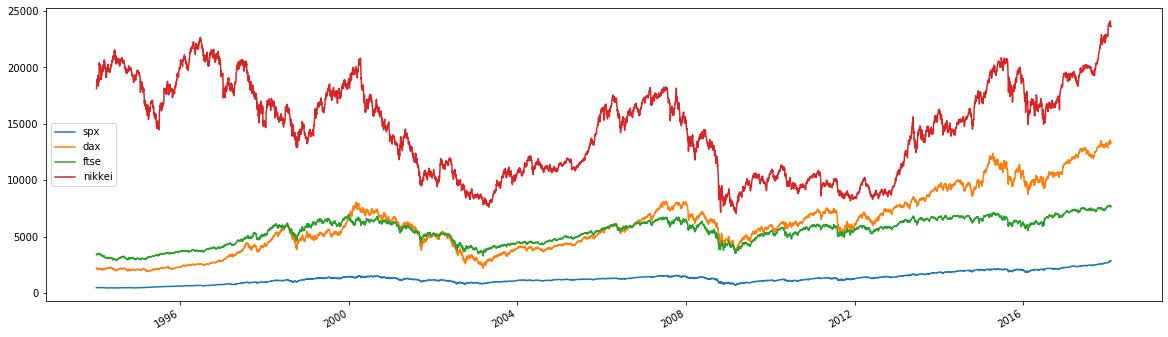

In [12]:
plt.figure()
data.sort_index().plot(figsize=(20, 6))

## **Quantile-Quantile Plot (QQ Plot)**

`QQ Plots` (Quantile-Quantile plots) are plots of two quantiles against each other. A quantile is a fraction where certain values fall below that quantile. For example, the median is a quantile where 50% of the data fall below that point and 50% lie above it. 

The purpose of `QQ plots` is to find out if two sets of data come from the same distribution. A 45 degree angle is plotted on the `QQ plot`; if the two data sets come from a common distribution, the points will fall on that reference line.

In [13]:
import scipy.stats as st
import pylab

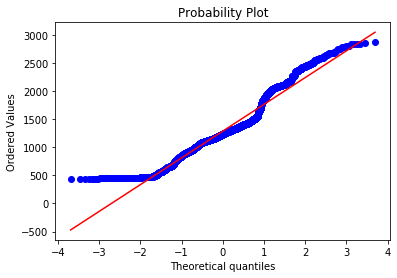

In [14]:
st.probplot(data.spx, plot=pylab);

- The QQ plot tqkes all the values a varaible con take, and arrange them in accending order.
- Theoretical quantiles represents how many standard diviations away from the mean these values are.
- The red line represents what the data should follow, if they are Normally Distributed.

## **Frequency**

Frequency is how often values of the data set are recorded, to be able to analyze a time series in a meaningful way, all time periods must be equal and clearly defined, which would result in a constant frequency.

In [15]:
data.asfreq('d').head()

,spx,dax,ftse,nikkei
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


In [16]:
data.asfreq('d').isna().sum()

spx       2520
dax       2520
ftse      2520
nikkei    2520
dtype: int64

The values the `df.asfreq` can take are specific letters of the alphabet.
- `h`: hourly
- `d`: daily
- `w`: weekly
- `m`: monthly
- `a`: annual/yearly
- `b`: business day

Note that by setting the frequency to daily, we some missing values appairs. This is because the data is of closing price market which is recorded only during working days. So, it's better to avoid adding such irrelevant information to our data.

In [17]:
data.asfreq('b').head()

,spx,dax,ftse,nikkei
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [18]:
data = data.asfreq('b')
data.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [19]:
data[data.isna().sum(axis=1) != 0]

,spx,dax,ftse,nikkei
2008-01-01,NaN,NaN,NaN,NaN
2009-01-01,NaN,NaN,NaN,NaN
2010-01-01,NaN,NaN,NaN,NaN
2013-01-01,NaN,NaN,NaN,NaN
2014-01-01,NaN,NaN,NaN,NaN
2015-01-01,NaN,NaN,NaN,NaN
2016-01-01,NaN,NaN,NaN,NaN
2018-01-01,NaN,NaN,NaN,NaN


Setting the frequency to `b` (business day) generates 8 missing values.

## **Handling Missing Values**

1. **Front filling**: fill the missed value by the value of the next record.
2. **Back filling**: fill the missed value by the value of the previous record.
3. **Assigning the same value**: Assign the average to all the missing values within the time-series.

In [20]:
data.spx.fillna(method='ffill', inplace=True)
data.isna().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [21]:
data.dax.fillna(method='bfill', inplace=True)
data.isna().sum()

spx       0
dax       0
ftse      8
nikkei    8
dtype: int64

In [22]:
data.ftse.fillna(value=data.ftse.mean(), inplace=True)
data.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

In [23]:
data.nikkei.fillna(value=data.nikkei.mean(), inplace=True)
data.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

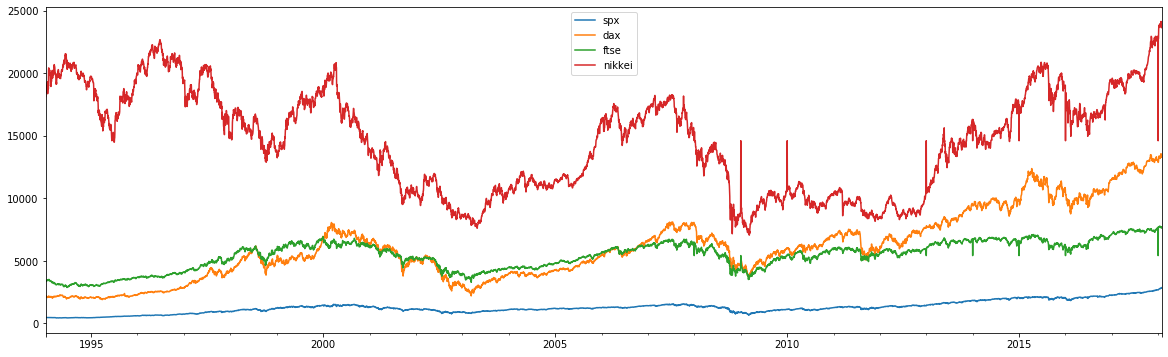

In [24]:
data.plot(figsize=(20, 6))

In [25]:
spx_data = data[['spx']]
spx_data.head()

,spx
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


## **Splitting the data**

We usually shuffle the data before splitting. But, shuffling is impossible in Time Series data.
- Training set: From the beginning up to some cut off point.
- Testing set: From cut off point until the end.

In [26]:
split_index = int(len(spx_data) * 0.8)
split_index

5021

In [27]:
df = spx_data.iloc[:split_index]
test_df = spx_data.iloc[split_index:]

In [28]:
print(df.shape)
print(test_df.shape)

(5021, 1)
(1256, 1)


In [29]:
df.tail()

,spx
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [30]:
test_df.head()

,spx
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623
